In [18]:
import pandas as pd

#Load the train and validation sets
train_df=pd.read_csv("./vaccine_train_set.csv",index_col=0)
val_df=pd.read_csv("./vaccine_validation_set.csv",index_col=0)

In [19]:
#Checks that there aren't any null values
train_df.head()
print(train_df.shape)
train_df.isnull().sum()

(15976, 2)


tweet    0
label    0
dtype: int64

In [20]:
#Checks that there aren't any null values
val_df.head()
print(val_df.shape)
val_df.isnull().sum()

(2282, 2)


tweet    0
label    0
dtype: int64

In [21]:
#######################################################
# Data preprocessing: Stopwords
#######################################################

# Prepare stopword list
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
#Keep all the negative words from stopwords
my_words=['ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
          'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 
'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#Uncomment the my_words list to get the results without the negative words in tweets
#my_words=[]
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
#include the punctuation in stopwords
custom_stopwords=sw.words('english')#.remove(x for x in my_words)
custom_stopwords=[ x for x in sw.words('english') if x not in my_words ]
stopwords = set(custom_stopwords+ list(string.punctuation)+['i','I'])
print(stopwords)

{"that'll", 'and', 'these', 't', 'each', 'or', '.', 'myself', '!', 'she', 'whom', 've', 'while', 'have', '"', 'those', 'our', 'too', 'do', 'herself', 'here', 'during', 'on', 'such', "'", 'both', 'with', 'himself', 'once', 'against', "should've", ')', 'between', 'are', 'so', '*', 'being', 'now', 'was', '<', 'd', 'll', 'few', 'did', '?', "it's", 'than', 'him', 'had', 'me', 'no', 'how', 'i', 's', 'were', '/', '\\', 'I', 'there', 'your', 'as', 'some', 'down', 'his', "you'll", 'hers', 'of', 'more', 'other', 'own', 'at', 'by', 'yourself', 'yours', 'am', '^', '$', '-', '%', ':', 'after', 'because', 're', ',', 'can', 'a', 'this', 'about', 'is', 'itself', ';', 'before', 'what', 'my', '@', 'from', 'not', 'them', '~', '_', 'any', 'he', 'yourselves', 'over', 'all', 'up', 'off', 'y', 'be', "you'd", 'has', 'that', 'themselves', 'will', 'they', "she's", 'then', 'm', 'ours', 'don', 'just', 'who', 'to', 'where', 'in', 'through', 'its', 'it', "don't", '}', 'until', 'but', 'most', 'nor', 'their', 'under'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mikem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mikem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
import re
ps = PorterStemmer()
#Keep all the words as it is gives as the best results
train_df["Filtered_words"]=train_df["tweet"]

#Cleaning
#The 2 lines below is the code where I remove the links, the stopwords, and the punctuations from train set
# train_df["Filtered_words"]=train_df["tweet"].apply(lambda row:re.sub(r'http\S+', '', row))
# train_df["Filtered_words"]=train_df['Filtered_words'].apply(lambda x: ' '.join([ps.stem(word.translate(str.maketrans('', '', string.punctuation)).lower()) for word in word_tokenize(x) if word not in (stopwords)]))


In [23]:
ps = PorterStemmer()
#Keep all the words as it is gives as the best results
val_df["Filtered_words"]=val_df["tweet"]

#Cleaning
#The 2 lines below is the code where I remove the links, the stopwords, and the punctuations from valid set
# val_df["Filtered_words"]=val_df["tweet"].apply(lambda row:re.sub(r'http\S+', '', row))
# val_df["Filtered_words"]=val_df['Filtered_words'].apply(lambda x: ' '.join([ps.stem(word.translate(str.maketrans('', '', string.punctuation)).lower()) for word in word_tokenize(x) if word not in (stopwords)]))


test_str="a new link https://www.facebook.com/ mpla mpla mpla !!"
print(re.sub(r'http\S+', '', test_str))

a new link  mpla mpla mpla !!


In [24]:
#print to see what the filtered words finally are
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(train_df.loc[:5,["tweet"]])
print(train_df.loc[:5,["Filtered_words"]])

                                                                                                                                          tweet
0  Sip N Shop Come thru right now #Marjais #PopularNobodies #MMR 🙌🙌🙌🙌 @ Marjais SipNShop http://t.co/JfWAH7uzWE                                
1  I don't know about you but My family and I will not take the #Covid19 vaccine anytime soon...                                               
2  @MSignorile Immunizations should be mandatory. Period. In Oklahoma, they won't let kids go to school without them. It's dangerous otherwise!
3  President Obama spoke in favor of vaccination for children. Fox will start telling its viewers to "choose" against vaccination in 3,2,1...  
4  "@myfoxla: Arizona monitoring hundreds for measles linked to Disneyland http://t.co/tEoU2zAQat" It's a Small World After All.               
5  Why did I get my whooping cough vaccine the same day I bring my baby home? I can't even lift my 5lb dog with that arm! #imweak       

C:\Users\mikem\AppData\Local\Temp/ipykernel_24476/3311916215.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [25]:
######################
##Train vectorizer####
######################
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#best vectorizer is TfidVectorizer 
#vectorizer=CountVectorizer(max_features=15000)
#vectorizer=HashingVectorizer(max_features=15000)

#Chose the vectorizer mode to proceed
#vectorizer=TfidfVectorizer()
vectorizer=TfidfVectorizer(min_df=0.0005,max_df=0.8)


vectorizer.fit(train_df['Filtered_words'])

TfidfVectorizer(max_df=0.8, min_df=0.0005)

In [26]:
#Vectorizing training set
vectorized_content=vectorizer.transform(train_df['Filtered_words'])
print(vectorized_content.shape)

(15976, 3034)


In [27]:
#Vectorizing validation set
vectorized_content_val=vectorizer.transform(val_df['Filtered_words'])
print(vectorized_content_val.shape)

(2282, 3034)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


params_=[{"C": [0.1,1, 10, 100],"penalty":['l2','none'],"solver":["newton-cg"],"max_iter":[100,1000]},
        {"C": [0.1,1, 10, 100],"penalty":['none','l2'],"solver":["lbfgs"],"max_iter":[100,1000]},
        {"C": [0.1,1, 10, 100],"penalty":['none','l2'],"solver":["sag"],"max_iter":[100,1000]},
        {"C": [0.1,1, 10, 100],"penalty":['elasticnet', 'l1', 'l2', 'none'],"solver":["saga"],"max_iter":[100,1000]}
]
#best combination on LogisticRegression{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
clf = LogisticRegression(C=1,max_iter=100,solver="newton-cg", penalty='l2').fit(vectorized_content, train_df["label"])

#a GridSearch to find the best combination
# clf = GridSearchCV(LogisticRegression(),cv=5,param_grid=params_,n_jobs=-1)
# clf.fit(vectorized_content, train_df["label"])
# print(clf.best_params_)  

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#make my predictions
val_df["predictions"]=clf.predict(vectorized_content_val)
#print the metrics
print("Accuracy: "+ str(accuracy_score(val_df["label"],val_df["predictions"])))
print("F1_score: "+str(f1_score(val_df["label"],val_df["predictions"],average='macro')))
print("Precision: "+str(precision_score(val_df["label"],val_df["predictions"],average='macro')))
print("Recall: "+str(recall_score(val_df["label"],val_df["predictions"],average='macro')))

Accuracy: 0.7261174408413672
F1_score: 0.6735708797339278
Precision: 0.7079955881508152
Recall: 0.6564215727403321


In [30]:
#Examples of my predictions and the true values of the data
print(val_df[["tweet","label","predictions"]].head(10))

                                                                                                                                                                                                  tweet  \
0  @user They had a massive surge in with covid deaths immediately after the vaccine rollout, way more than they had during the entirety of the "pandemic" up to that point. Fuck those jabs, Dr.Death.   
1  Required vaccines for school: Parents and guardians of children with school exclusion letters now have an... http://t.co/KVl8Dt86dz                                                                    
2  “@KCStar: Two more Johnson County children have measles http://t.co/Rvx07sc” @sethmnookin                                                                                                              
3  NV can do better. Which states are the best (and worst) at vaccinating their kids http://t.co/6GaZGgYA9z http://t.co/pTFRJZ2Tmr"                                                         

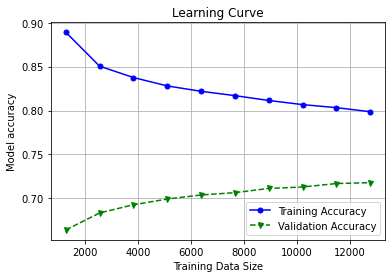

In [31]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

#I used the recomended function to plot the learning curves but on the next cell I created my own (in order to include the given calidation set)
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=vectorized_content, y=train_df['label'],  cv=5, train_sizes=np.linspace(0.1, 1.0, 10),scoring = 'accuracy',n_jobs=-1)

#print(train_scores)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='v', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [32]:
#A function from the python library mlxtend to print a learning curve using my validation set
# from mlxtend.plotting import plot_learning_curves

# plot_learning_curves(vectorized_content, train_df['label'], vectorized_content_val, val_df['label'], clf, scoring = "accuracy")
# plt.show()

#my implementation
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np

#Take n_subsets equally different portions of the train-set
def data_size_response(model,trX,valX,trY,valY,score_func,n_subsets=20):

    train_scores,test_scores = [],[]
    subset_sizes = np.linspace(3,trX.shape[0],n_subsets).astype(int)
    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        train_err = score_func(trY[:m],model.predict(trX[:m]))
        test_err = score_func(valY,model.predict(valX))
        train_scores.append(train_err)
        test_scores.append(test_err)

    return subset_sizes,train_scores,test_scores

#Plot the scores 
def plot_response(subset_sizes,train_scores,test_scores):

    plt.plot(subset_sizes,train_scores,lw=2, color='blue', marker='o', markersize=5,)
    plt.plot(subset_sizes,test_scores,lw=2, color='green', marker='v', markersize=5, linestyle='--')
    plt.legend(['Training Scores','Validation Scores'])
    plt.xlabel('Dataset size')
    plt.ylabel('Accuracy_Score')
    plt.grid()
    plt.title('Model response to dataset size')
    plt.show()

#Scores that can be used: accuracy_score, f1_score, precision_score, recall_score
response = data_size_response(clf,vectorized_content,vectorized_content_val,train_df['label'],val_df['label'],accuracy_score)
plot_response(*response)

AttributeError: 'numpy.float64' object has no attribute 'append'

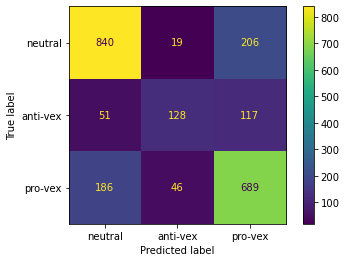

In [ ]:
#The confusion matrix of my predictions
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf, vectorized_content_val, val_df['label'],display_labels=['neutral','anti-vex','pro-vex'])
plt.show()

In [ ]:
#cv-score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, vectorized_content, train_df['label'], cv=5)
print(scores.mean())

0.7177017241818314
